# Test type I mocks
In this notebook I will create a few type I AGN mock spectra, and will compare them to the stacks by Richards et al. (2023). Then, I will use a subset of the full sample Andy sent me to create a population of type I AGN, and will estimate their magnitudes and colors. I will compare these to the observed colors of AGN and galaxies from  HSC. 

**Note:** after some back and forth, we decided to simulate only blue quasars with blue optical slopes. These blue quasars do not generaly represent the whole population of quasars, since we neglect red quasars. The reason of this decision is that we plan to take the spectra of these type I AGN and add them to a host galaxy spectrum, which will result in a population of redder quasars. Therefore, using only the type I AGN spectra (without adding a host galaxy spectrum), we do not expect the colors to match the colors of real quasars. 

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../code/")

import create_mocks
import create_AGN_from_galaxy

from astropy.io import fits
from pyphot import Filter
from pyphot import unit

In [2]:
import importlib
importlib.reload(create_mocks)
importlib.reload(create_AGN_from_galaxy)

<module 'create_AGN_from_galaxy' from '/Users/dalyabaron/Documents/GitHub/PFS_AGN_simulator/notebooks/../code/create_AGN_from_galaxy.py'>

# Test the type I mocks
### (1) construct four mock spectra and compare them to the stacked spectra by Richards et al. 
Note that our spectra will be generaly bluer!

In [3]:
wave1, flux1_ = create_mocks.makeQSO(1e8, 1e45, 1, -1, return_redshifted=False)[:2]
wave2, flux2_ = create_mocks.makeQSO(1e9, 1e46, 1, -1, return_redshifted=False)[:2]
wave3, flux3_ = create_mocks.makeQSO(3e9, 1e47, 1, -1, return_redshifted=False)[:2]
wave4, flux4_ = create_mocks.makeQSO(1e10, 1e47, 1, -1, return_redshifted=False)[:2]

Load the Richards et al stacks of "regular" type I AGN from SDSS

In [4]:
path = "/Users/dalyabaron/Documents/PFS/richards_2003_qso_composites/redqsospectra/ginormchunksubcomp.0n.spec"
wl_temp_1, flux_temp_1 = np.loadtxt(path, skiprows=1, usecols=[0,1], unpack=True)

path = "/Users/dalyabaron/Documents/PFS/richards_2003_qso_composites/redqsospectra/ginormchunksubcomp.1n.spec"
wl_temp_2, flux_temp_2 = np.loadtxt(path, skiprows=1, usecols=[0,1], unpack=True)

path = "/Users/dalyabaron/Documents/PFS/richards_2003_qso_composites/redqsospectra/ginormchunksubcomp.2n.spec"
wl_temp_3, flux_temp_3 = np.loadtxt(path, skiprows=1, usecols=[0,1], unpack=True)

path = "/Users/dalyabaron/Documents/PFS/richards_2003_qso_composites/redqsospectra/ginormchunksubcomp.3n.spec"
wl_temp_4, flux_temp_4 = np.loadtxt(path, skiprows=1, usecols=[0,1], unpack=True)

def plot_richards_templates():
    wl_1_small = wl_temp_1[(wl_temp_1 > 1300) & (wl_temp_1 < 6800)]
    flux_1_small = flux_temp_1[(wl_temp_1 > 1300) & (wl_temp_1 < 6800)]
    flux_1_norm = np.interp(4040, wl_1_small, flux_1_small)
    plt.step(wl_1_small, flux_1_small/flux_1_norm, "k", label="Richards 1")

    wl_2_small = wl_temp_2[(wl_temp_2 > 1300) & (wl_temp_2 < 6800)]
    flux_2_small = flux_temp_2[(wl_temp_2 > 1300) & (wl_temp_2 < 6800)]
    flux_2_norm = np.interp(4040, wl_2_small, flux_2_small)
    plt.step(wl_2_small, flux_2_small/flux_2_norm, "k", label="Richards 2", alpha=0.7)

    wl_3_small = wl_temp_3[(wl_temp_3 > 1300) & (wl_temp_3 < 6800)]
    flux_3_small = flux_temp_3[(wl_temp_3 > 1300) & (wl_temp_3 < 6800)]
    flux_3_norm = np.interp(4040, wl_3_small, flux_3_small)
    plt.step(wl_3_small, flux_3_small/flux_3_norm, "k", label="Richards 3", alpha=0.5)

    wl_4_small = wl_temp_4[(wl_temp_4 > 1300) & (wl_temp_4 < 6800)]
    flux_4_small = flux_temp_4[(wl_temp_4 > 1300) & (wl_temp_4 < 6800)]
    flux_4_norm = np.interp(4040, wl_4_small, flux_4_small)
    plt.step(wl_4_small, flux_4_small/flux_4_norm, "k", label="Richards 4", alpha=0.3)

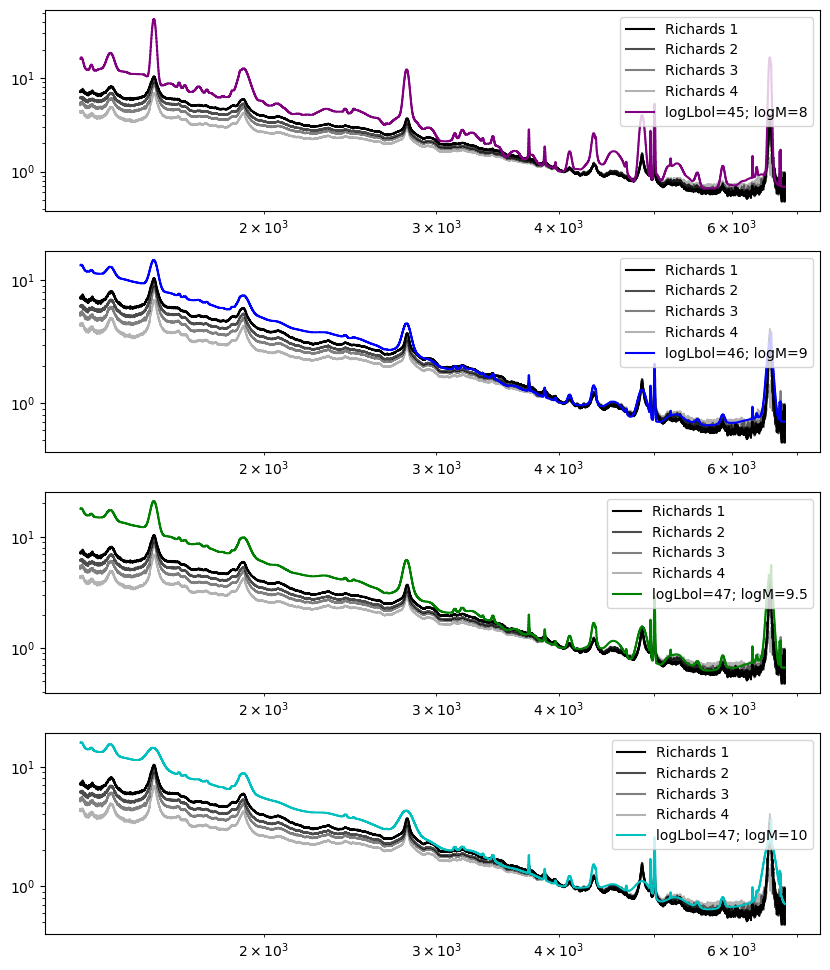

In [5]:
plt.figure(1, figsize=(10, 12))

##################################################################################################
plt.subplot(4, 1, 1)
plot_richards_templates()

wave1_small = wave1[(wave1 > 1300) & (wave1 < 6800)]
flux1_small = flux1_[(wave1 > 1300) & (wave1 < 6800)]
flux1_norm = np.interp(4040, wave1_small, flux1_small)
plt.step(wave1_small, flux1_small/flux1_norm, "purple", label="logLbol=45; logM=8")

plt.legend(loc="best")
plt.yscale("log")
plt.xscale("log")

##################################################################################################
plt.subplot(4, 1, 2)
# start by ploting two of the templates by Richards
plot_richards_templates()

#
wave2_small = wave2[(wave2 > 1300) & (wave2 < 6800)]
flux2_small = flux2_[(wave2 > 1300) & (wave2 < 6800)]
flux2_norm = np.interp(4040, wave2_small, flux2_small)
plt.step(wave2_small, flux2_small/flux2_norm, "blue", label="logLbol=46; logM=9")

plt.legend(loc="best")
plt.yscale("log")
plt.xscale("log")

##################################################################################################
plt.subplot(4, 1, 3)
# start by ploting two of the templates by Richards
plot_richards_templates()

#
wave3_small = wave3[(wave3 > 1300) & (wave3 < 6800)]
flux3_small = flux3_[(wave3 > 1300) & (wave3 < 6800)]
flux3_norm = np.interp(4040, wave3_small, flux3_small)
plt.step(wave3_small, flux3_small/flux3_norm, "green", label="logLbol=47; logM=9.5")

plt.legend(loc="best")
plt.yscale("log")
plt.xscale("log")

#####################################################################################################
plt.subplot(4, 1, 4)
# start by ploting two of the templates by Richards
plot_richards_templates()

#
wave4_small = wave4[(wave4 > 1300) & (wave4 < 6800)]
flux4_small = flux4_[(wave4 > 1300) & (wave4 < 6800)]
flux4_norm = np.interp(4040, wave4_small, flux4_small)
plt.step(wave4_small, flux4_small/flux4_norm, "c", label="logLbol=47; logM=10")

plt.legend(loc="best")
plt.yscale("log")
plt.xscale("log")

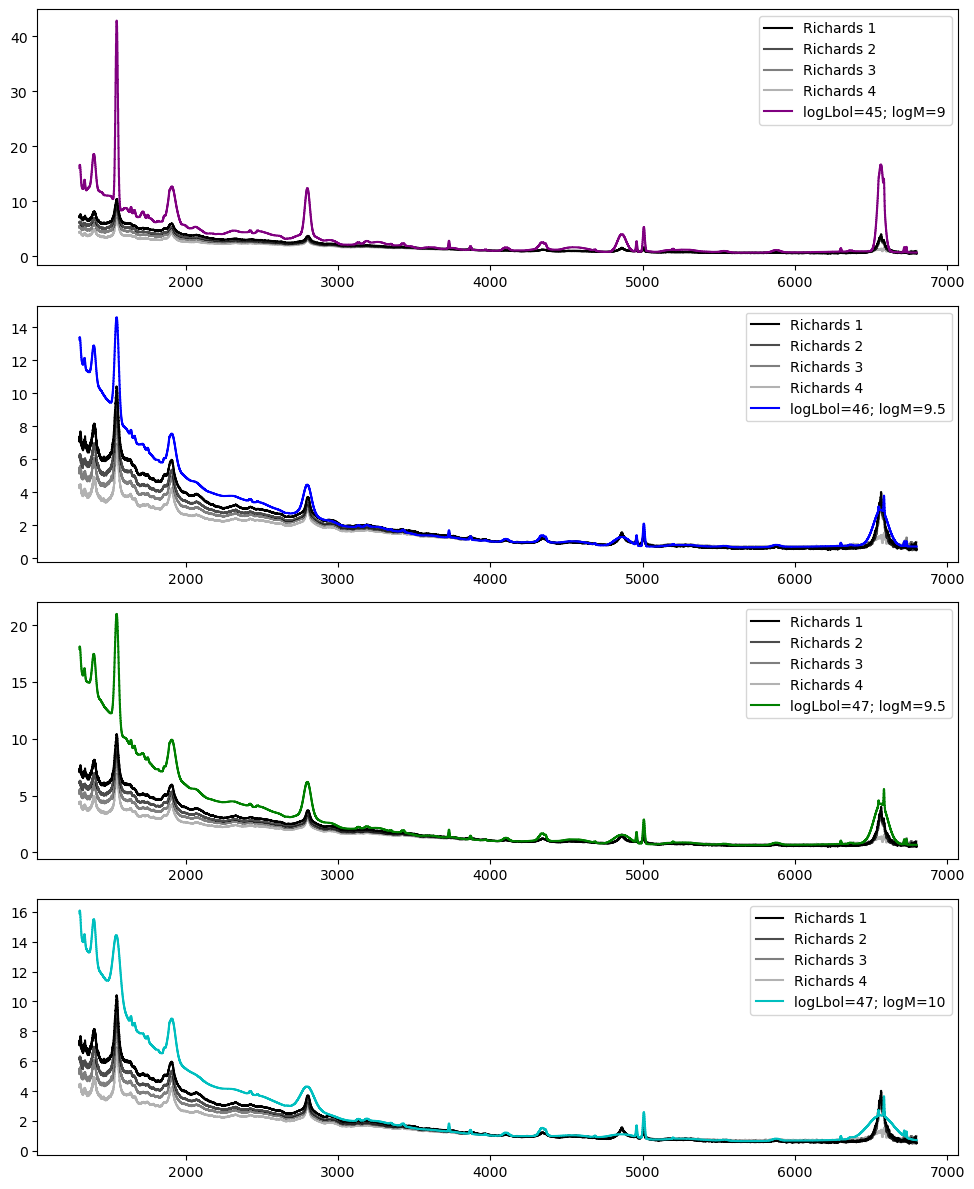

In [6]:
plt.figure(1, figsize=(10, 12))

##################################################################################################
plt.subplot(4, 1, 1)
plot_richards_templates()

wave1_small = wave1[(wave1 > 1300) & (wave1 < 6800)]
flux1_small = flux1_[(wave1 > 1300) & (wave1 < 6800)]
flux1_norm = np.interp(4040, wave1_small, flux1_small)
plt.step(wave1_small, flux1_small/flux1_norm, "purple", label="logLbol=45; logM=9")

plt.legend(loc="best")

##################################################################################################
plt.subplot(4, 1, 2)
# start by ploting two of the templates by Richards
plot_richards_templates()

#
wave2_small = wave2[(wave2 > 1300) & (wave2 < 6800)]
flux2_small = flux2_[(wave2 > 1300) & (wave2 < 6800)]
flux2_norm = np.interp(4040, wave2_small, flux2_small)
plt.step(wave2_small, flux2_small/flux2_norm, "blue", label="logLbol=46; logM=9.5")

plt.legend(loc="best")

##################################################################################################
plt.subplot(4, 1, 3)
# start by ploting two of the templates by Richards
plot_richards_templates()

#
wave3_small = wave3[(wave3 > 1300) & (wave3 < 6800)]
flux3_small = flux3_[(wave3 > 1300) & (wave3 < 6800)]
flux3_norm = np.interp(4040, wave3_small, flux3_small)
plt.step(wave3_small, flux3_small/flux3_norm, "green", label="logLbol=47; logM=9.5")

plt.legend(loc="best")

#####################################################################################################
plt.subplot(4, 1, 4)
# start by ploting two of the templates by Richards
plot_richards_templates()

#
wave4_small = wave4[(wave4 > 1300) & (wave4 < 6800)]
flux4_small = flux4_[(wave4 > 1300) & (wave4 < 6800)]
flux4_norm = np.interp(4040, wave4_small, flux4_small)
plt.step(wave4_small, flux4_small/flux4_norm, "c", label="logLbol=47; logM=10")

plt.legend(loc="best")


plt.tight_layout()

### (2) Test the colors of the resulting mocks
For that, I will load the table Andy sent me with the host galaxies properties. I will use a subset of the full sample and will estimate their BH and AGN properties. I will use these properties to create the mock type I AGN spectra and will estimate their magnitudes and colors, which I will then compare to the observed colors of quasars.

In [7]:
path = "../survey_PFS_0_src_May23.fits"
h = fits.open(path)
data = h[1].data

data

FITS_rec([(       1888067397,  2.31072998,  2.14848709, 0.69024998, 23.02524185, 22.531353  , 22.05895233, 21.95724869, 22.00283051, 22.00540924, 4.51000009e+11, 2.14499994e+09,  8.18799973),
          (       1888069850,  2.32365417,  2.19863009, 0.69256502, 24.33727837, 23.88686371, 23.39998245, 23.32904816, 23.26174355, 23.19828796, 1.92599998e+11, 8.56700032e+08,  0.9109    ),
          (       1888068255,  2.05950928,  2.2837379 , 0.69326103, 22.64671326, 21.72599602, 20.97424698, 20.61491776, 20.44791412, 20.2087326 , 7.34799987e+11, 3.14300006e+10, 17.30999947),
          ...,
          (26000000462368667, -2.3248291 , -2.30043411, 1.71284604, 24.22973442, 23.99590683, 23.74430847, 23.51178169, 23.21148109, 22.73784447, 3.49400007e+11, 8.74499994e+09, 36.52000046),
          (       1048227070, -2.33129883, -2.30132604, 1.71118701, 26.57938576, 26.29346657, 25.80625343, 25.6343174 , 25.14326859, 24.61763954, 3.80999991e+11, 2.22400000e+09,  3.04900002),
          (       1048201

In [8]:
src_id_all = data['SrcID']
redshift_all = data['z']
log_m_star_all = np.log10(data['Mstar'])

print(len(src_id_all))

1984052


In [25]:
indices_all = np.arange(len(src_id_all))
indices_select = np.random.choice(indices_all, 100000)

src_id = src_id_all[indices_select]
redshift = redshift_all[indices_select]
log_m_star = log_m_star_all[indices_select]
print(len(src_id))

100000


For each of the galaxies, simulate an AGN that will obey the different mass and luminosity functions, and the known correlations between its different properties

In [26]:
log_m_bh = create_AGN_from_galaxy.return_BH_mass(log_m_star)
log_edd_ratio = create_AGN_from_galaxy.return_logEdd_ratio(redshift, log_m_star)
log_L_bol = create_AGN_from_galaxy.return_logLbol(log_m_bh, log_edd_ratio)
log_L_x = create_AGN_from_galaxy.return_logLx(log_L_bol)
AGN_duty = create_AGN_from_galaxy.return_duty_cycle(log_m_bh, log_L_x)
AGN_type = create_AGN_from_galaxy.return_AGN_type(AGN_duty, log_L_x)

print("Out of %s sources, %s are type I AGN" % (len(AGN_type), len(AGN_type[AGN_type == 1])))

Out of 100000 sources, 971 are type I AGN


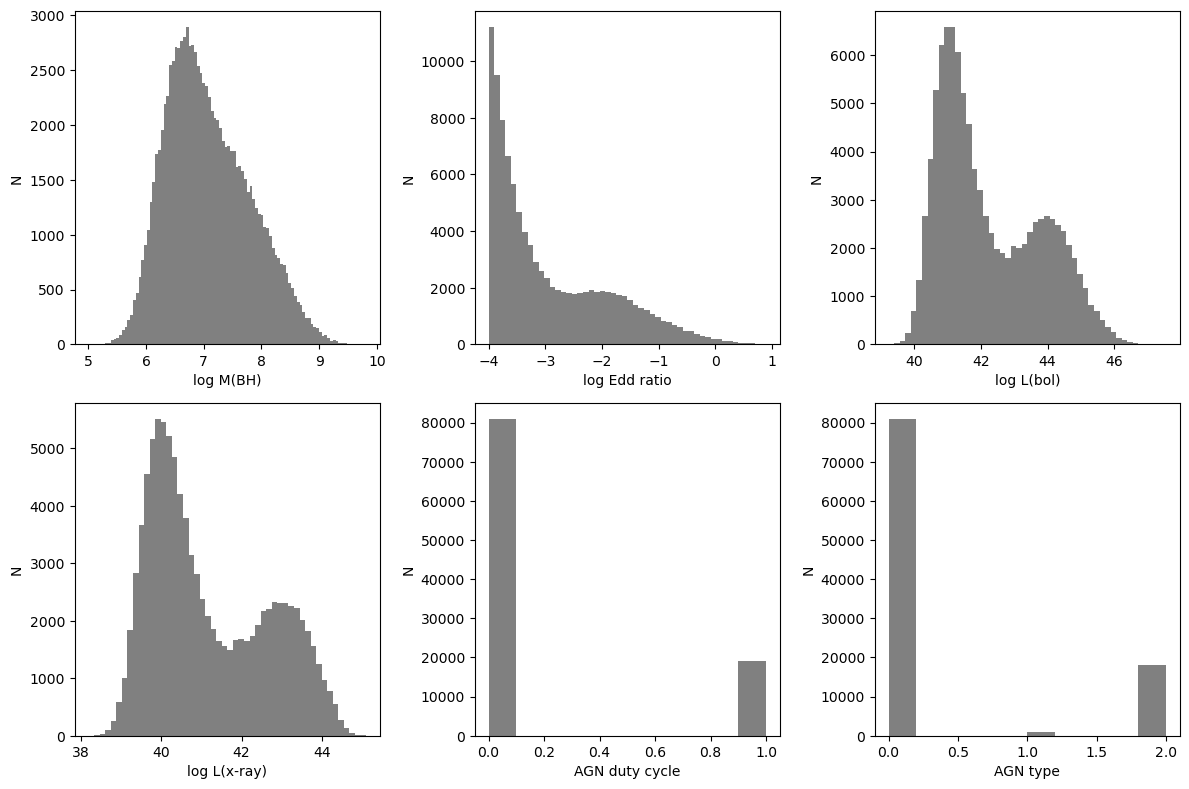

In [27]:
plt.figure(1, figsize=(12, 8))

plt.subplot(2, 3, 1)
tmp = plt.hist(log_m_bh, bins=100, color="grey")
plt.xlabel("log M(BH)")
plt.ylabel("N")

plt.subplot(2, 3, 2)
tmp = plt.hist(log_edd_ratio, bins=50, color="grey")
plt.xlabel("log Edd ratio")
plt.ylabel("N")

plt.subplot(2, 3, 3)
tmp = plt.hist(log_L_bol, bins=50, color="grey")
plt.xlabel("log L(bol)")
plt.ylabel("N")

plt.subplot(2, 3, 4)
tmp = plt.hist(log_L_x, bins=50, color="grey")
plt.xlabel("log L(x-ray)")
plt.ylabel("N")

plt.subplot(2, 3, 5)
tmp = plt.hist(AGN_duty, bins=10, color="grey")
plt.xlabel("AGN duty cycle")
plt.ylabel("N")

plt.subplot(2, 3, 6)
tmp = plt.hist(AGN_type, bins=10, color="grey")
plt.xlabel("AGN type")
plt.ylabel("N")

plt.tight_layout()

Using all these derived properties, simulate the spectra of these AGN and calculate their magnitudes and colors.

In [ ]:
%%time
time_t=0

zmock = []
mockmag=[]

for i in range(len(redshift)):
    if i%200 == 0:
        print(i)
        
    # select only type I AGN
    if AGN_type[i]==1:
        
        BH_mass = 10**log_m_bh[i]
        Lbol = 10**log_L_bol[i]
        z = redshift[i]
        log_Ledd = log_edd_ratio[i]
        
        zmock.append(z)
        wave_q, flux_q, f_line_q = create_mocks.makeQSO(BH_mass, Lbol, z, log_Ledd)
        # calculate the magnitudes
        F_total_ = np.copy(flux_q)
        F_total_[np.isnan(flux_q)] = 0
        mag=[create_mocks.myFilter(filter_name,wave_q,F_total_) for filter_name in ['g','r','i','z','hsc_g','hsc_r','hsc_i','hsc_z','hsc_y']]
        mockmag.append([0,0,i,*mag])

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000


In [ ]:
mockmag=numpy.array(mockmag)
zmock = numpy.array(zmock)

In [ ]:
gr_mock=[]
ri_mock=[]
iz_mock=[]
zy_mock=[]
i_mock=[]
for iii in range(len(mockmag)):
    gr_mock.append(mockmag[iii,7]-mockmag[iii,8])
    ri_mock.append(mockmag[iii,8]-mockmag[iii,9])
    iz_mock.append(mockmag[iii,9]-mockmag[iii,10])
    zy_mock.append(mockmag[iii,10]-mockmag[iii,11])
    i_mock.append(mockmag[iii,9])

In [ ]:
meanV=[]
stdV=[]
for ii in numpy.arange(0.7,1.72,0.2):
    temp=[]
    for jj in range(len(gr_mock)):
        if zmock[jj,0]>=ii-0.1 and zmock[jj,0]<ii+0.1:
            temp.append([gr_mock[jj],ri_mock[jj],iz_mock[jj],zy_mock[jj]])
    meanV.append([numpy.mean(numpy.array(temp)[:,0]),numpy.mean(numpy.array(temp)[:,1]),\
                  numpy.mean(numpy.array(temp)[:,2]),numpy.mean(numpy.array(temp)[:,3])])
    stdV.append([numpy.std(numpy.array(temp)[:,0]),numpy.std(numpy.array(temp)[:,1]),\
                 numpy.std(numpy.array(temp)[:,2]),numpy.std(numpy.array(temp)[:,3])])

In [ ]:
#test colors
plt.figure(figsize=(5,8))
a=numpy.loadtxt('/Users/dalyabaron/Documents/PFS/mockAGN_pfs_2021/wide_stellar.tbl')
z=[a[kk,13] for kk in range(len(a)) if a[kk,8]<0.1 and a[kk,6]<0.1 and a[kk,10]<0.1 ]
gr=[a[kk,3]-a[kk,5] for kk in range(len(a)) if a[kk,8]<0.1 and a[kk,6]<0.1 and a[kk,10]<0.1 ]
ri=[a[kk,5]-a[kk,7] for kk in range(len(a)) if a[kk,8]<0.1 and a[kk,6]<0.1 and a[kk,10]<0.1 ]
iz=[a[kk,7]-a[kk,9] for kk in range(len(a)) if a[kk,8]<0.1 and a[kk,6]<0.1 and a[kk,10]<0.1 ]
zy=[a[kk,9]-a[kk,11] for kk in range(len(a)) if a[kk,8]<0.1 and a[kk,6]<0.1 and a[kk,10]<0.1 ]

plt.subplot(411)
plt.plot(z,gr,'.',color='orange',ms=.8)
plt.plot(zmock[:,0], gr_mock,'.',color='grey',ms=3)
plt.errorbar(numpy.arange(0.7,1.72,0.2),numpy.array(meanV)[:,0],yerr=numpy.array(stdV)[:,0],fmt='o',color='k',capthick=0,lw=2)
plt.xlim(0.5,2.)
plt.ylim(-0.5,2)
plt.ylabel('g-r',fontsize=17)
plt.xticks(fontsize=0)
plt.yticks(fontsize=17)

plt.subplot(412)
plt.plot(z,ri,'.',color='orange',ms=0.8)
plt.plot(zmock[:,0], ri_mock,'.',color='grey',ms=3)
plt.errorbar(numpy.arange(0.7,1.72,0.2),numpy.array(meanV)[:,1],yerr=numpy.array(stdV)[:,1],fmt='o',color='k',capthick=0,lw=2)
plt.xlim(0.5,2.)
plt.ylim(-0.5,2)
plt.ylabel('r-i',fontsize=17)
plt.xticks(fontsize=0)
plt.yticks(fontsize=17)

plt.subplot(413)
plt.plot(z,iz,'.',color='orange',ms=0.8)
plt.plot(zmock[:,0],iz_mock,'.',color='grey',ms=3)
plt.errorbar(numpy.arange(0.7,1.72,0.2),numpy.array(meanV)[:,2],yerr=numpy.array(stdV)[:,2],fmt='o',color='k',capthick=0,lw=2)
plt.xlim(0.5,2.)
plt.ylim(-0.5,1.5)
plt.ylabel('i-z',fontsize=17)
plt.xticks(fontsize=0)
plt.yticks(fontsize=17)

plt.subplot(414)
plt.plot(z,zy,'.',color='orange',ms=0.8)
plt.plot(zmock[:,0],zy_mock,'.',color='grey',ms=3)
plt.errorbar(numpy.arange(0.7,1.72,0.2),numpy.array(meanV)[:,3],yerr=numpy.array(stdV)[:,3],fmt='o',color='k',capthick=0,lw=2)
plt.xlim(0.5,2.)
plt.ylim(-0.5,1)
plt.xlabel('z',fontsize=17)
plt.ylabel('z-y',fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)